In [1]:
import pandas as pd

In [231]:
df = pd.read_csv('lu_daily_temps.csv')

In [229]:
df = round(df,2)

In [232]:
df

,Date,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
0,2013-01-01,22.34,20.24,14.97,17.44,18.73,22.11,14.85,12.17
1,2013-01-02,22.20,22.31,13.84,18.75,19.82,14.23,15.67,12.92
2,2013-01-03,21.50,20.51,16.47,20.91,18.80,19.63,15.94,13.94
3,2013-01-04,22.74,20.01,16.55,19.12,20.12,15.09,19.80,12.60
4,2013-01-05,22.89,21.05,18.09,18.74,18.97,18.62,15.02,12.62
...,...,...,...,...,...,...,...,...,...
3647,2022-12-27,23.76,24.23,17.48,22.15,20.79,26.33,16.03,15.30
3648,2022-12-28,24.81,22.90,18.46,24.37,20.85,23.47,14.13,14.77
3649,2022-12-29,25.49,23.42,17.19,22.38,20.31,27.29,16.00,11.34
3650,2022-12-30,25.81,23.39,17.86,21.76,19.73,24.27,15.64,13.04


In [227]:
df.dtypes

Date                  object
Bakerloo             float64
Central              float64
Jubilee              float64
Northern             float64
Piccadilly           float64
Victoria             float64
Waterloo_and_City    float64
Sub-surface_lines    float64
dtype: object

In [4]:
d = []

for i in range(len(df)):
    
    y = df.iloc[i,0]
    m = df.iloc[i,1]
    
    date = pd.to_datetime('1' + m + str(y))
    d.append(date)
    

In [5]:
df['date']=d

In [6]:
df=df.set_index('date')

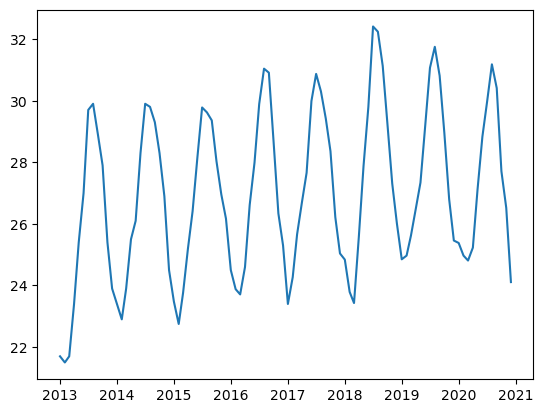

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.index, df.Bakerloo)

In [217]:
stds = {}

for i in df.Month.unique():
    subset = df[df.Month == i]
    
    months = {}
    
    for j in ['Bakerloo', 'Central', 'Jubilee', 'Northern',
       'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub-surface_lines']:
        
        sub_subset = subset[j]
        months[j] =sub_subset.std()
    stds[i] = months
        

In [218]:
import random

days_per_month = {'January' : 31, 'February' : 28, 'March' : 31, 'April' : 30, 'May' :31, 'June' : 30,
                  'July' :31, 'August' : 31, 'September' : 30, 'October' : 31, 'November' : 30, 'December' : 31}
days_per_month_leap = {'January' : 31, 'February' : 29, 'March' : 31, 'April' : 30, 'May' :31, 'June' : 30,
                  'July' :31, 'August' : 31, 'September' : 30, 'October' : 31, 'November' : 30, 'December' : 31}


bake = []
cen = []
jub = []
north = []
pic = []
vic = []
wat = []
subs = []
date = []



for i in range(len(df)):
         
    y = df.iloc[i,0]
    m = df.iloc[i,1]
    
    if y%4 != 0:
    
        for j in range(days_per_month[m]):
            
            d = pd.to_datetime(str(j + 1) + m + str(y))
            sub = df[(df.Year == y) & (df.Month == m)]
            
            bake.append(np.random.normal(sub.loc[:,'Bakerloo'][0], stds[m]['Bakerloo']))
            cen.append(np.random.normal(sub.loc[:,'Central'][0], stds[m]['Central']))
            jub.append(np.random.normal(sub.loc[:,'Jubilee'][0], stds[m]['Jubilee']))
            north.append(np.random.normal(sub.loc[:,'Northern'][0], stds[m]['Northern']))
            pic.append(np.random.normal(sub.loc[:,'Piccadilly'][0], stds[m]['Piccadilly']))
            vic.append(np.random.normal(sub.loc[:,'Victoria'][0], stds[m]['Victoria']))
            wat.append(np.random.normal(sub.loc[:,'Waterloo_and_City'][0], stds[m]['Waterloo_and_City']))
            subs.append(np.random.normal(sub.loc[:,'Sub-surface_lines'][0], stds[m]['Sub-surface_lines']))
            date.append(d)
    else:
            
        for j in range(days_per_month_leap[m]):
            
            d = pd.to_datetime(str(j + 1) + m + str(y))
            sub = df[(df.Year == y) & (df.Month == m)]
            
            bake.append(np.random.normal(sub.loc[:,'Bakerloo'][0], stds[m]['Bakerloo']))
            cen.append(np.random.normal(sub.loc[:,'Central'][0], stds[m]['Central']))
            jub.append(np.random.normal(sub.loc[:,'Jubilee'][0], stds[m]['Jubilee']))
            north.append(np.random.normal(sub.loc[:,'Northern'][0], stds[m]['Northern']))
            pic.append(np.random.normal(sub.loc[:,'Piccadilly'][0], stds[m]['Piccadilly']))
            vic.append(np.random.normal(sub.loc[:,'Victoria'][0], stds[m]['Victoria']))
            wat.append(np.random.normal(sub.loc[:,'Waterloo_and_City'][0], stds[m]['Waterloo_and_City']))
            subs.append(np.random.normal(sub.loc[:,'Sub-surface_lines'][0], stds[m]['Sub-surface_lines']))
            date.append(d)
        

In [66]:
df.columns

Index(['Year', 'Month', 'Bakerloo', 'Central', 'Jubilee', 'Northern',
       'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub-surface_lines'],
      dtype='object')

In [219]:
new_df = pd.DataFrame({'Date' : date, 'Bakerloo' : bake, 'Central' : cen, 'Jubilee' : jub, 'Northern' : north,
       'Piccadilly' : pic, 'Victoria' : vic, 'Waterloo_and_City' : wat, 'Sub-surface_lines' : subs})

In [220]:
new_df


,Date,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
0,2013-01-01,22.339056,20.239599,14.966697,17.440355,18.725385,22.110812,14.850303,12.169284
1,2013-01-02,22.203218,22.313507,13.839401,18.750314,19.822914,14.227802,15.669795,12.924756
2,2013-01-03,21.496738,20.513904,16.466878,20.911987,18.795717,19.631460,15.943324,13.936770
3,2013-01-04,22.739561,20.005947,16.552624,19.115688,20.124353,15.085133,19.800957,12.597457
4,2013-01-05,22.888387,21.045649,18.091259,18.742272,18.968331,18.621052,15.017529,12.619274
...,...,...,...,...,...,...,...,...,...
3647,2022-12-27,23.760563,24.227424,17.480985,22.148450,20.785308,26.333655,16.030120,15.298575
3648,2022-12-28,24.813426,22.904526,18.457220,24.371963,20.847190,23.473970,14.133594,14.774329
3649,2022-12-29,25.494373,23.419713,17.188549,22.376151,20.307467,27.289220,15.999076,11.335531
3650,2022-12-30,25.811498,23.391143,17.863323,21.764848,19.730292,24.271700,15.644395,13.036332


In [222]:
new_df.to_csv('lu_daily_temps.csv', index=False)

In [70]:
new_df = new_df.set_index('Date')

In [86]:
resamp = new_df.resample('M').mean()

In [87]:
resamp

,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
Date,,,,,,,,
2013-01-31,21.697328,20.803199,16.224299,19.029283,19.245240,17.907603,16.490561,11.946213
2013-02-28,21.756649,20.996743,17.951061,19.573578,18.808965,19.767140,16.937275,11.773661
2013-03-31,21.822146,21.060977,17.752038,20.095741,18.679965,17.323798,16.805649,11.338875
2013-04-30,23.459405,23.125658,20.270877,21.223257,20.433985,19.006300,18.345732,15.182988
2013-05-31,25.337525,24.734923,22.291725,23.258259,22.302617,21.627575,20.462610,18.286939
...,...,...,...,...,...,...,...,...
2020-08-31,30.985038,30.535043,26.206637,28.059804,27.430315,29.297765,22.031425,24.829726
2020-09-30,30.311960,29.066807,24.216082,27.579120,26.126964,28.789269,20.496922,22.245588
2020-10-31,27.838827,26.464143,21.150072,25.580211,23.561195,28.161837,17.887463,17.845158


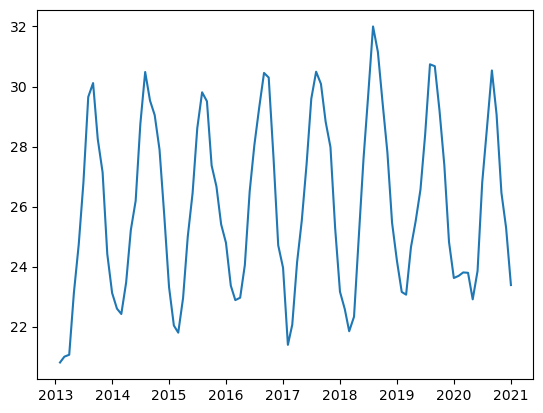

In [158]:
plt.plot(resamp['Central'])

In [170]:
pm = pmdarima.arima.auto_arima(resamp['Bakerloo'], seasonal = True, m = 12,D=1,d=1)

In [171]:
get_parametes = pm.get_params()
get_parametes

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 2, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [211]:
preds = {}
pred_df =pd.DataFrame()

for j in ['Bakerloo', 'Central', 'Jubilee', 'Northern',
       'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub-surface_lines']:


    pm = pmdarima.arima.auto_arima(resamp[j], seasonal = True, m = 12, d =1 , D = 1)
    get_parametes = pm.get_params()
    
    p = get_parametes['order'][0]
    d = get_parametes['order'][1]
    q = get_parametes['order'][2]
    
    P = get_parametes['seasonal_order'][0]
    D = get_parametes['seasonal_order'][1]
    Q = get_parametes['seasonal_order'][2]
    M = get_parametes['seasonal_order'][3]
    
    
    sarima = SARIMAX(resamp[j],order=(p, d , q),seasonal_order=(P,D,Q,12)).fit()
    
    start = pd.to_datetime('31/01/2021', format = '%d/%m/%Y')
    end= pd.to_datetime('31/12/2022', format = '%d/%m/%Y')
    
    predicts = sarima.predict(start=start,end=end) 
    
    pred_df[j] = round(predicts,2)

C:\Users\Alastair Tyson\anaconda3_v2\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Alastair Tyson\anaconda3_v2\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [212]:
m = []
y= []

for i in pred_df.index:
    m.append(i.strftime('%B'))
    y.append(i.year)

In [213]:
pred_df['Year'] = y
pred_df['Month'] = m

In [214]:
pred_df

,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines,Year,Month
2021-01-31,23.19,21.82,17.74,21.75,19.42,23.30,14.54,12.49,2021,January
2021-02-28,23.36,22.01,18.78,21.68,19.00,24.00,15.04,12.53,2021,February
2021-03-31,23.77,22.83,18.97,22.16,19.47,24.04,15.73,13.40,2021,March
2021-04-30,25.10,24.34,20.30,23.25,21.40,24.23,16.57,16.52,2021,April
2021-05-31,26.58,26.09,21.63,24.41,23.24,25.28,17.20,19.65,2021,May
2021-06-30,28.43,28.25,23.53,25.89,25.17,27.31,18.78,22.62,2021,June
2021-07-31,30.31,29.98,25.25,27.77,27.00,29.39,20.20,25.44,2021,July
2021-08-31,30.55,30.00,25.14,27.91,26.74,29.66,20.42,24.68,2021,August
2021-09-30,29.66,28.71,23.98,27.24,25.63,28.90,19.37,22.18,2021,September
2021-10-31,28.11,27.18,22.05,25.94,24.07,28.19,17.53,18.25,2021,October


In [216]:
df = pd.concat([df, pred_df])